# Quick Webb Photometry Sample Notebook #

This notebooks relies on the quickwebb set of routines to do a quick and dirty photometry analysis.

The QuickWebb module has the following functions.
- webbcrawl: Get info about files in a directory
- photnow: Do quick and dirty aperture photometry

This notebook also makes use of the jdaviz Imviz tool for designing the aperture for the photometry.

In [1]:
import quickwebb as qw

## Step 1: Crawl through a directory to get info on each data file

Set the data_directory to the directory where you might find your data. 

In this example I'm using the data found at https://www.stsci.edu/jwst/science-planning/proposal-planning-toolbox/simulated-data under NIRCam and LMC.  

The box folder is: 
https://stsci.app.box.com/s/ga6qtpdo6zazhbxhm60y51x9j02fe9f5 You only need the FITS files.


In [2]:
data_directory = '/Users/smullally/jwst/simulated_data/nircam_lmc/'
files = qw.webbcrawl(data_directory)

  INSTRUME MODULE DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM
0   NIRCAM      B    NRCB1  F115W  CLEAR  214.7354     FULL  UNKNOWN     570
1   NIRCAM      B    NRCB1  F200W  CLEAR  214.7354     FULL  UNKNOWN     570


In [3]:
#Notice that files also contains the path for easy access
print(files)

  INSTRUME MODULE DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM  \
0   NIRCAM      B    NRCB1  F115W  CLEAR  214.7354     FULL  UNKNOWN     570   
1   NIRCAM      B    NRCB1  F200W  CLEAR  214.7354     FULL  UNKNOWN     570   

                                                                                       PATH  
0  /Users/smullally/jwst/simulated_data/nircam_lmc/jw01072001001_01101_00001_nrcb1_cal.fits  
1  /Users/smullally/jwst/simulated_data/nircam_lmc/jw01072001001_01101_00005_nrcb1_cal.fits  


## Run imviz and select a few stars.
Imviz allows you to select circular regions, which can then be returned to the notebook. 

In [5]:
from jdaviz import Imviz
imviz = Imviz()
imviz.app


Application(config='imviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'des…

In [6]:
#This load the first image, but you might want a different one.
imviz.load_data(files['PATH'][0])

## Mark a few subset circles using imviz above.

In [9]:
regions = imviz.get_interactive_regions()
regions

{'Subset 1': <CirclePixelRegion(center=PixCoord(x=967.607666015625, y=809.5753173828125), radius=16.7730712890625)>,
 'Subset 2': <CirclePixelRegion(center=PixCoord(x=1240.251220703125, y=883.4907836914062), radius=22.40576171875)>,
 'Subset 3': <CirclePixelRegion(center=PixCoord(x=1214.796875, y=987.185302734375), radius=20.24688720703125)>,
 'Subset 4': <CirclePixelRegion(center=PixCoord(x=1237.294677734375, y=1196.0106201171875), radius=20.14337158203125)>,
 'Subset 5': <CirclePixelRegion(center=PixCoord(x=1545.83935546875, y=1117.7459716796875), radius=15.45147705078125)>,
 'Subset 6': <CirclePixelRegion(center=PixCoord(x=372.1564025878906, y=569.534423828125), radius=23.8514404296875)>}

## Now run photnow on the regions

Subset 1


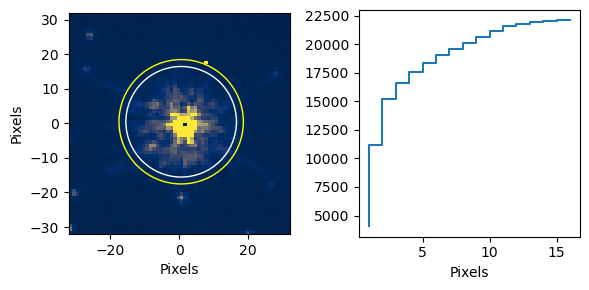

Aper. Photometry: 22101.332 +/-    23.195
Subset 2


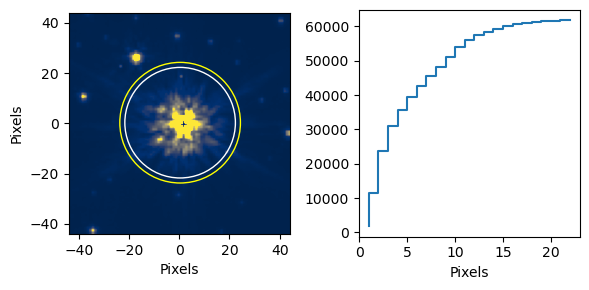

Aper. Photometry: 61781.558 +/-    55.225
Subset 3


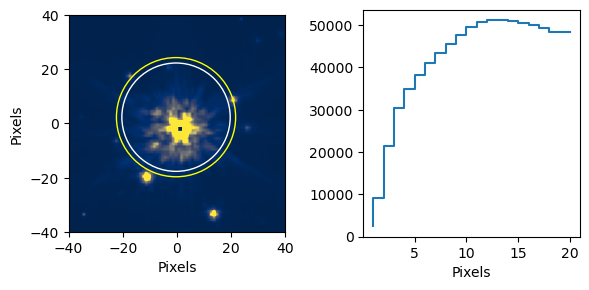

Aper. Photometry: 48425.754 +/-    89.403
Subset 4


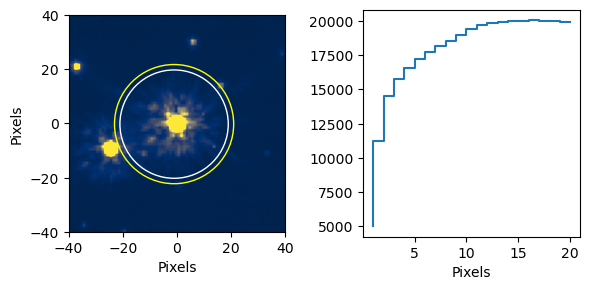

Aper. Photometry: 19921.024 +/-    20.216
Subset 5


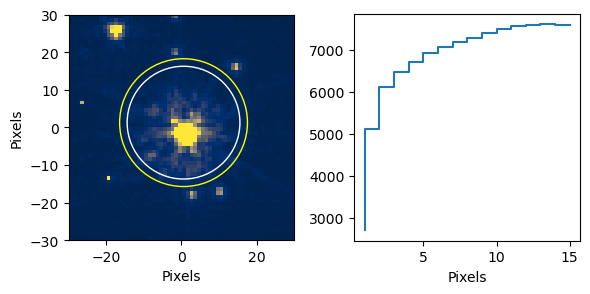

Aper. Photometry:  7597.694 +/-     7.905
Subset 6


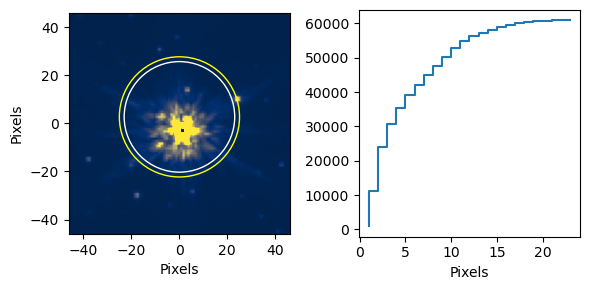

Aper. Photometry: 60897.495 +/-    49.785


In [10]:
regions['Subset 1'].center.xy
for subset in regions.keys():
    print(subset)
    photometry, cutout, cen = qw.photnow(files['PATH'][0], regions[subset].center.xy, radii_pixels=int(regions[subset].radius))

In [ ]:
photometry